In [1]:
# Load the cleaned data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import os

df = pd.read_csv("data" + os.path.sep + "autos_85_clean.csv")

In [2]:
# Get the basic descriptive statistics for non-categorical/string features
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-lpg,highway-mpg,price,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,2.010000e+02,201.000000,201.000000,197.000000,197.000000,201.000000,201.000000,199.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.477697,4.949054e-16,2555.666667,126.875622,3.330711,3.256904,10.164279,103.393035,5117.587940,9.944145,30.686567,13207.129353,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.179613,1.000000e+00,517.296727,41.546834,0.270793,0.319256,4.004965,37.365623,480.521824,2.534599,6.815150,7947.066342,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.000000,-2.437541e+00,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,4.795918,16.000000,5118.000000,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.324786,-7.217300e-01,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,7.833333,25.000000,7775.000000,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.444444,1.361755e-01,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,9.791667,30.000000,10295.000000,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.538462,7.081124e-01,2926.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,12.368421,34.000000,16500.000000,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,2.464776e+00,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,18.076923,54.000000,45400.000000,1.000000,1.000000


In [3]:
# Value counts
drive_wheels_cunts = df["drive-wheels"].value_counts().to_frame()

display(drive_wheels_cunts)

print(type(drive_wheels_cunts))

drive_wheels_cunts.rename(columns = {"drive-wheels":"value_counts"}, inplace = True)
drive_wheels_cunts.index.name = "drive-wheels"
drive_wheels_cunts.head()

,drive-wheels
fwd,118
rwd,75
4wd,8


<class 'pandas.core.frame.DataFrame'>


,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


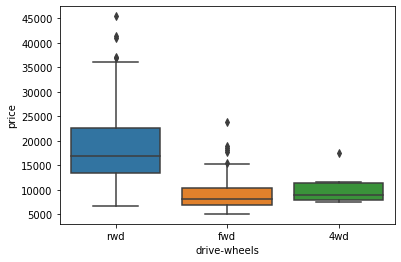

In [4]:
# Create a bocplot of the data
sns.boxplot(x = "drive-wheels", y = "price", data = df)

Text(0.5, 1.0, 'Correlation between the engine size and price')

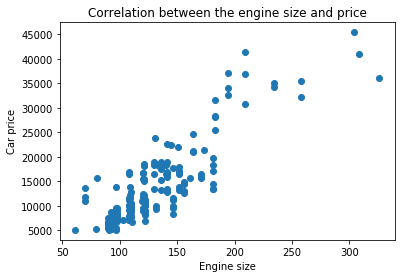

In [5]:
# Scatter plot the prices versus the engine size
%matplotlib inline
plt.scatter(df["engine-size"], df["price"])

plt.xlabel("Engine size")
plt.ylabel("Car price")
plt.title("Correlation between the engine size and price")

In [6]:
# Using grouping
df_test = df[["drive-wheels", "body-style", "price"]]

df_group = df_test.groupby(["drive-wheels", "body-style"], as_index = False).mean()
display(df_group)

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [7]:
# Pivot the table to make it easier to read
df_pivot = df_group.pivot(index = "drive-wheels", columns = "body-style")
df_pivot = df_pivot.fillna(0) #fill missing values with 0

display(df_pivot)

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

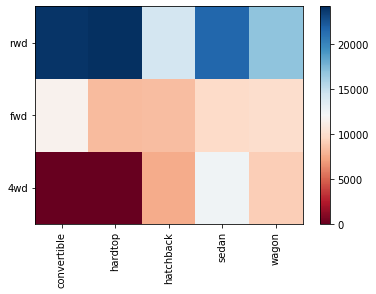

In [8]:
# Hitmap the pivot table to make it easier to read
fig, ax = plt.subplots()
im = ax.pcolor(df_pivot, cmap="RdBu")

#label names
row_labels = df_pivot.columns.levels[1]
col_labels = df_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(df_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(df_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [9]:
# Analysis of Variance (ANOVA): Find correlation between different groupd of categorical variables
df_anova = df[["make", "price"]]
df_anova_grouped = df_anova.groupby(["make"])

honda_prices = df_anova_grouped.get_group("honda")["price"]
subaru_prices = df_anova_grouped.get_group("subaru")["price"]

hs_anova = stats.f_oneway(honda_prices, subaru_prices)
display(hs_anova)

# There is no correlation here, the statistics value is < 1 and the p value is > 0.05
# This just means there is NO significant difference between Honda and Subaru prices

F_onewayResult(statistic=0.19744030127462606, pvalue=0.6609478240622193)

In [10]:
honda_prices = df_anova_grouped.get_group("honda")["price"]
jaguar_prices = df_anova_grouped.get_group("jaguar")["price"]

hs_anova = stats.f_oneway(honda_prices, jaguar_prices)
display(hs_anova)

# There is A BIG correlation here, the statistics value is >> 1 and the p value is << 0.05
# This just means there is a significant difference between Honda and Jaguar prices

F_onewayResult(statistic=400.925870564337, pvalue=1.0586193512077862e-11)

(0, 53439.11464788401)

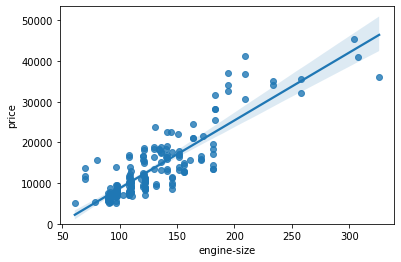

In [11]:
# Correlation between two features: Positive correlation - the line is steap the correlation is strong
%matplotlib inline
sns.regplot(x = "engine-size", y = "price", data = df)
plt.ylim(0,)

(-10000, 48163.815174338386)

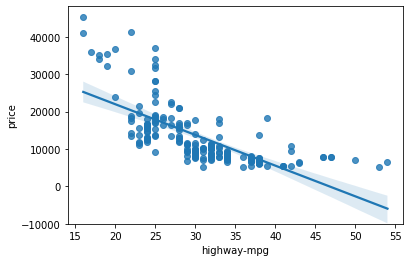

In [12]:
# Correlation between two features: Negative correlation - the line is steap the correlation is strong
%matplotlib inline
sns.regplot(x = "highway-mpg", y = "price", data = df)
plt.ylim(-10000,)

(0, 47414.11669426048)

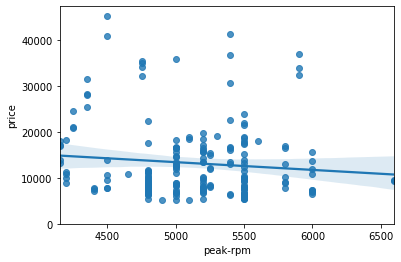

In [13]:
# Correlation between two features: Weak correlation - the line is almost flat
%matplotlib inline
sns.regplot(x = "peak-rpm", y = "price", data = df)
plt.ylim(0,)

Pearson coef: 0.8097290352560285, P-value: 5.924001027593172e-48


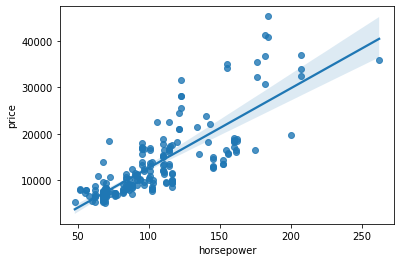

In [14]:
# Pierson correlation gives the statistics and the p-value:
#  * Statistics:
#     +1 - Large Positive Relationship
#      0 - No Relationship
#     -1 -  Large Negative Relationship
#  * P-value: (certainty in the result)
#     < 0.001 Strong
#     < 0.05  Moderate
#     < 0.01  Weak
#     > 0.01  No

%matplotlib inline
sns.regplot(x = "horsepower", y = "price", data = df)

pearson_coef, p_value = stats.pearsonr(df["horsepower"], df["price"])
print("Pearson coef: " + str(pearson_coef) + ", P-value: "+ str(p_value))

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-lpg,highway-mpg,price,price-binned,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,11.190476,27,13495.0,Low,Low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,11.190476,27,16500.0,Low,Low,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154,5000.0,12.368421,26,16500.0,Low,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102,5500.0,9.791667,30,13950.0,Low,Low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115,5500.0,13.055556,22,17450.0,Low,Low,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,9.5,114,5400.0,10.217391,28,16845.0,Low,Low,0,1
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,8.7,160,5300.0,12.368421,25,19045.0,Medium,Medium,0,1
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,8.8,134,5500.0,13.055556,23,21485.0,Medium,Medium,0,1
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,23.0,106,4800.0,9.038462,27,22470.0,Medium,Low,1,0


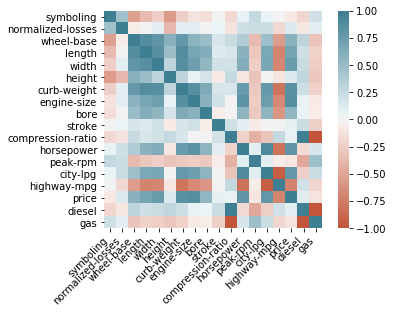

In [15]:
display(df)
# Create the correlation map
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [16]:
# Get unique values from a column
print(df['drive-wheels'].unique())

['rwd' 'fwd' '4wd']
